In [1]:
! pip install opencv-python

In [1]:
import cv2
from tqdm import tqdm
from sklearn.utils import shuffle
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



In [2]:
# Path to the folder where all images are kept (without train/test split)
data_path = 'C:/Users/Dave Pooja/Desktop/seminar/leaf_detection/Potato'

In [3]:
labels = ['early_bliht','late_blight','healthy']
CLASS_NAMES = labels

C:\conda_temp\ipykernel_13512\181823120.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette="viridis", orient="h")


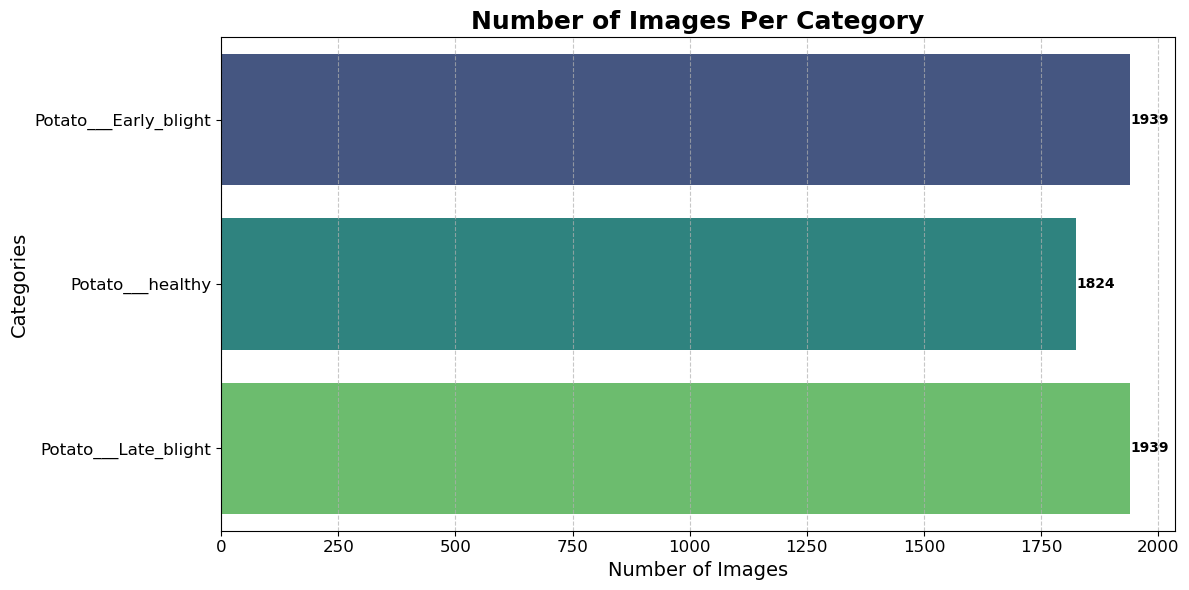

In [4]:
from collections import defaultdict
category_counts = defaultdict(int)

# Loop over each category folder
for category in os.listdir(data_path):
    category_folder = os.path.join(data_path, category)
    if os.path.isdir(category_folder):
        image_count = len(os.listdir(category_folder))
        category_counts[category] = image_count

# Prepare for plotting
labels = list(category_counts.keys())
counts = list(category_counts.values())
plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=labels, palette="viridis", orient="h")

for i, count in enumerate(counts):
    plt.text(count + 0.5, i, str(count), va='center', fontsize=10, fontweight='bold', color='black')


plt.title("Number of Images Per Category", fontsize=18, fontweight='bold')
plt.xlabel("Number of Images", fontsize=14)
plt.ylabel("Categories", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()

In [5]:
#List of all labels (categories)
labels = os.listdir(data_path)

# Lists to hold images and their labels
X = []
y = []

image_size = 224

# Loop through each category folder
for i in labels:
    folderPath = os.path.join(data_path, i)
    if os.path.isdir(folderPath):
        # Loop through each image in the category
        for j in tqdm(os.listdir(folderPath)):
            img_path = os.path.join(folderPath, j)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))  # Resize to 224x224
            X.append(img)
            y.append(i)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(f"Training set size: {len(X_train)} images")
print(f"Testing set size: {len(X_test)} images")

100%|██████████| 1939/1939 [00:41<00:00, 47.18it/s]


Training set size: 4561 images
Testing set size: 1141 images


In [6]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

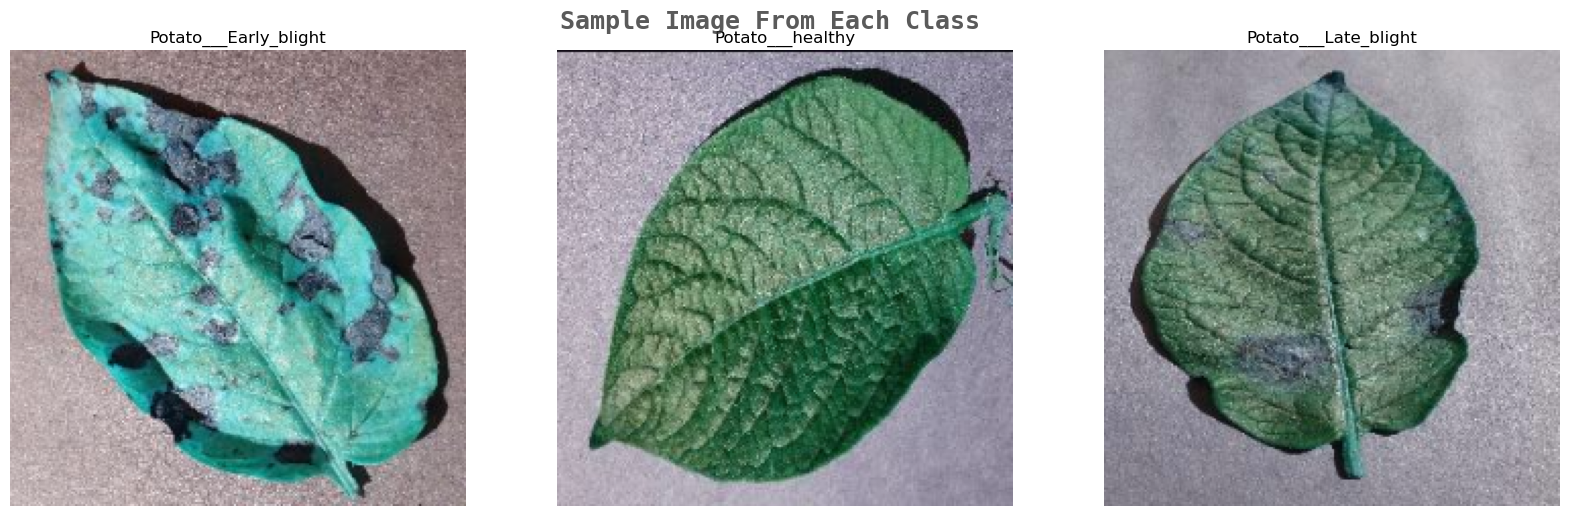

In [7]:
k=0
fig, ax = plt.subplots(1,3,figsize=(20,20))
fig.text(s='Sample Image From Each Class',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

Found 4564 images belonging to 3 classes.
Found 1138 images belonging to 3 classes.


c:\Users\Dave Pooja\Desktop\sample_project_1\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Dave Pooja\Desktop\sample_project_1\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.5808 - loss: 0.8578 - val_accuracy: 0.8190 - val_loss: 0.4444
Epoch 2/2
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 103ms/step - accuracy: 0.8847 - loss: 0.3110 - val_accuracy: 0.9429 - val_loss: 0.1689
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9678 - loss: 0.1055
Validation Accuracy: 94.29%
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step


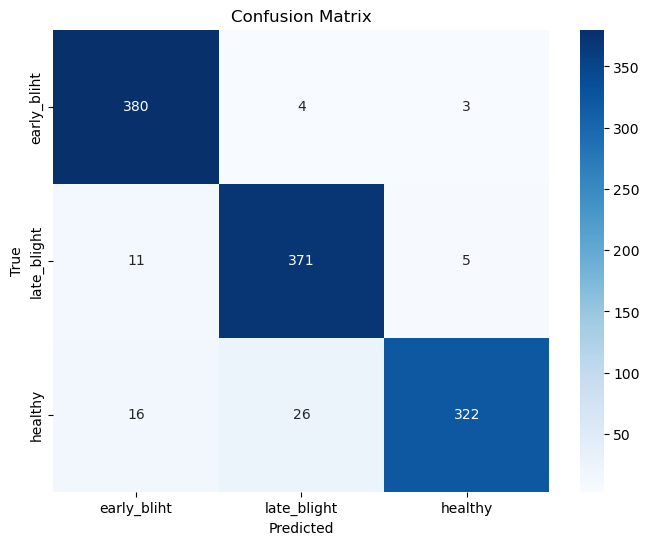

              precision    recall  f1-score   support

 early_bliht       0.93      0.98      0.96       387
 late_blight       0.93      0.96      0.94       387
     healthy       0.98      0.88      0.93       364

    accuracy                           0.94      1138
   macro avg       0.94      0.94      0.94      1138
weighted avg       0.94      0.94      0.94      1138



In [8]:


train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

#  Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(CLASS_NAMES), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#  Train
model.fit(train_generator, epochs=2, validation_data=val_generator)

#  Evaluate
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

#  Confusion matrix
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Optional classification report
print(classification_report(y_true, y_pred_classes, target_names=CLASS_NAMES))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
early_bliht


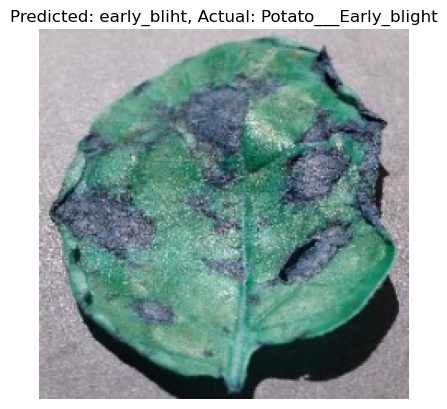

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Randomly select one test image
random_idx = random.randint(0, len(X_test) - 1)
test_image = X_test[random_idx]
true_label = y_test[random_idx]
image_size=64
# Resize to model input size and normalize
img = cv2.resize(test_image, (image_size, image_size))
img = img.astype("float32") / 255.0

# Expand dimensions to match model input shape: (1, 64, 64, 3)
img = np.expand_dims(img, axis=0)

# Predict the class
pred_prob = model.predict(img)
pred_class = np.argmax(pred_prob, axis=1)[0]

#Display the image
plt.imshow(test_image)
plt.axis("off")
plt.title(f"Predicted: {CLASS_NAMES[pred_class]}, Actual: {true_label}")
plt.show()

